# Predict average temperature in Riyadh using ARIMA model

## Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
#plt.style.use('fivethirtyeight')
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

## Dataset Description:

- The weather riyadah Dataset contain informations about weather in Riyadh across period of time which is in this case days start from 2008 to 2018, with 13 attributes that describes it which are:
   - Date,Temperature_Max,Temperature_avg,Temperature_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,
     Humidity_Min ,Wind_speed_Max, Wind_speed_Min,Pressure_Max,Pressure_Min.


## Problem Definition:



- Using the feature that are provided in the weather dataset which are: 
   - Temperature_Max,Temperature_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max, Humidity_Min   ,Wind_speed_Max, Wind_speed_Min,Pressure_Max,Pressure_Min and the goal is to create a time series problem and predict Temperature_avg in the next days. 

## EDA and visualizations of weather data:



In [2]:
# get the data
weather=pd.read_csv('Riyadh_weather.csv')

In [3]:
#check data shape
weather.shape

(4016, 13)

In [4]:
#check data types
weather.dtypes

date                object
Temperature_Max      int64
Temperature_Avg      int64
Temperature_Min      int64
Dew_Point_Max        int64
Dew_Point_Avg        int64
Dew_Point_Min        int64
Humidity_Max         int64
Humidity_Min         int64
Wind_speed_Max       int64
Wind_speed_Min       int64
Pressure_Max       float64
Pressure_Min       float64
dtype: object

In [5]:
#get statistic values about data
weather.describe()

,Temperature_Max,Temperature_Avg,Temperature_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,Humidity_Min,Wind_speed_Max,Wind_speed_Min,Pressure_Max,Pressure_Min
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,91.496763,78.940239,66.306026,41.836404,35.024900,28.726345,40.444472,11.735060,13.142430,1.195468,29.998825,29.814119
std,16.206974,14.971568,14.275661,10.496154,9.523537,9.675794,23.750423,10.733824,5.870256,2.039434,0.185788,0.214163
min,44.000000,37.000000,23.000000,7.000000,2.000000,-117.000000,9.000000,4.000000,2.000000,0.000000,29.590000,29.330000
25%,78.000000,66.000000,55.000000,34.000000,29.000000,23.000000,20.000000,4.000000,9.000000,0.000000,29.860000,29.650000
50%,94.000000,80.000000,68.000000,41.000000,34.000000,28.000000,34.000000,8.000000,13.000000,0.000000,30.010000,29.830000
75%,107.000000,93.000000,79.000000,48.000000,41.000000,34.000000,56.000000,15.000000,16.000000,2.000000,30.150000,29.980000
max,117.000000,104.000000,96.000000,72.000000,65.000000,63.000000,100.000000,88.000000,115.000000,15.000000,30.490000,30.360000


In [6]:
#get the top 5 rows
weather.head()

,date,Temperature_Max,Temperature_Avg,Temperature_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,Humidity_Min,Wind_speed_Max,Wind_speed_Min,Pressure_Max,Pressure_Min
0,2008-1-1,78,62,46,36,30,27,53,17,8,0,30.15,30.01
1,2008-1-2,80,68,55,39,33,30,41,20,14,4,30.06,29.95
2,2008-1-3,80,66,51,43,37,30,58,18,9,0,30.09,29.98
3,2008-1-4,71,65,59,57,45,36,82,37,13,0,30.09,29.98
4,2008-1-5,66,60,51,57,51,46,94,55,14,0,30.18,30.06


In [7]:
# get low 5 rows
weather.tail()

,date,Temperature_Max,Temperature_Avg,Temperature_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,Humidity_Min,Wind_speed_Max,Wind_speed_Min,Pressure_Max,Pressure_Min
4011,2018-12-27,73,62,50,41,38,34,66,14,16,2,30.12,29.97
4012,2018-12-28,78,66,53,52,41,34,55,23,16,2,30.12,29.91
4013,2018-12-29,64,58,51,45,41,39,72,28,10,2,30.21,30.03
4014,2018-12-30,66,58,50,50,44,36,68,40,12,0,30.18,30.02
4015,2018-12-31,68,62,53,50,48,45,82,33,17,0,30.27,30.03


In [8]:
# get data info
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 13 columns):
date               4016 non-null object
Temperature_Max    4016 non-null int64
Temperature_Avg    4016 non-null int64
Temperature_Min    4016 non-null int64
Dew_Point_Max      4016 non-null int64
Dew_Point_Avg      4016 non-null int64
Dew_Point_Min      4016 non-null int64
Humidity_Max       4016 non-null int64
Humidity_Min       4016 non-null int64
Wind_speed_Max     4016 non-null int64
Wind_speed_Min     4016 non-null int64
Pressure_Max       4016 non-null float64
Pressure_Min       4016 non-null float64
dtypes: float64(2), int64(10), object(1)
memory usage: 408.0+ KB


In [9]:
# converting date column into date type
weather['date'] = pd.to_datetime(weather['date'])

In [10]:
# set date date as index to convert data to a time series
weather.set_index('date', inplace=True)

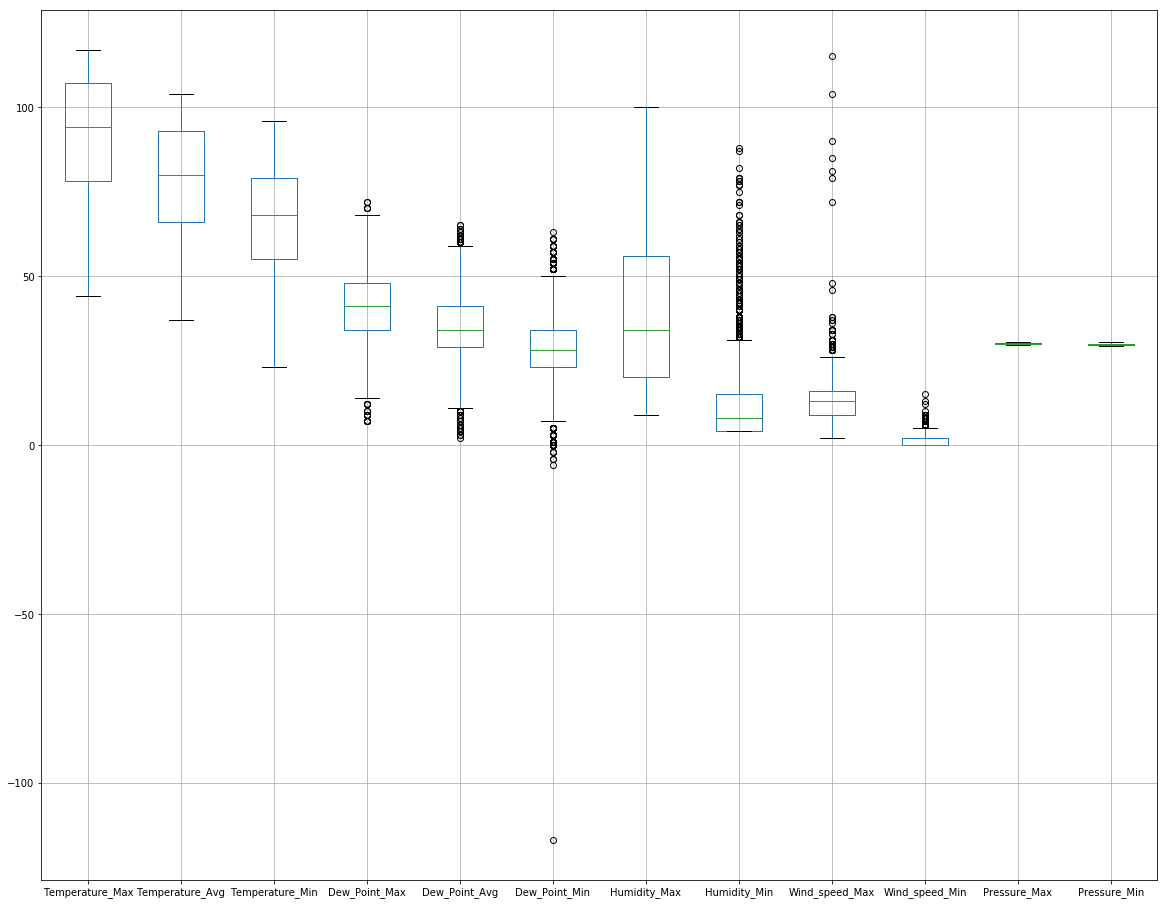

In [11]:
#Identify any potantial outliars 
ax1=weather.boxplot(figsize=(20,16))

In [12]:
#get and  remove outlair in Dew_Point_Min - 117.000000 where it conn't ever been (it's an error)
#source(https://journals.ametsoc.org/doi/pdf/10.1175/1520-0477-36.3.128)
weather[['Dew_Point_Min']].idxmin() 
#using fill forward approach
weather['2009-05-27']=None
weather['2009-05-27']=weather[['Dew_Point_Min']].ffill()

In [13]:
#check values of that row after manipulation
weather['2009-05-27']

,Temperature_Max,Temperature_Avg,Temperature_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,Humidity_Min,Wind_speed_Max,Wind_speed_Min,Pressure_Max,Pressure_Min
date,,,,,,,,,,,,
2009-05-27,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0


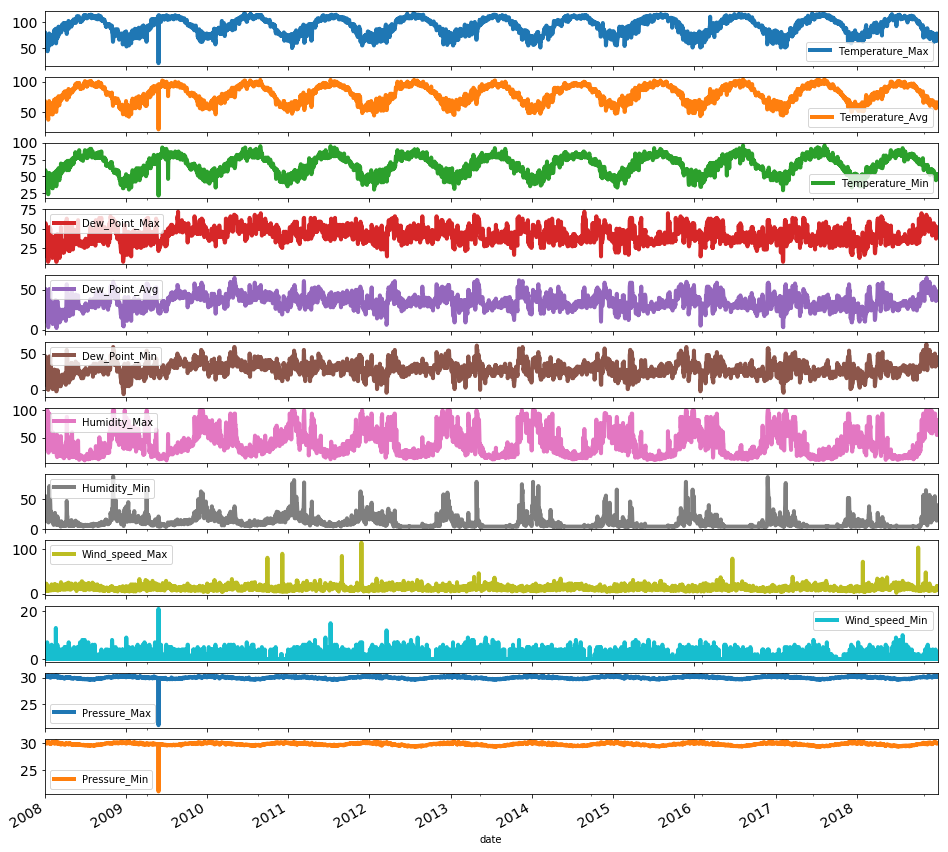

In [14]:
# get data visualization after transform it to time series
weather.plot(subplots=True,figsize=(16,16),fontsize=14,linewidth=4)
 
plt.show()

### There is a need to use different rolling windows to helps seeing any long term trends that are hard to spot in the original data [Resampling]

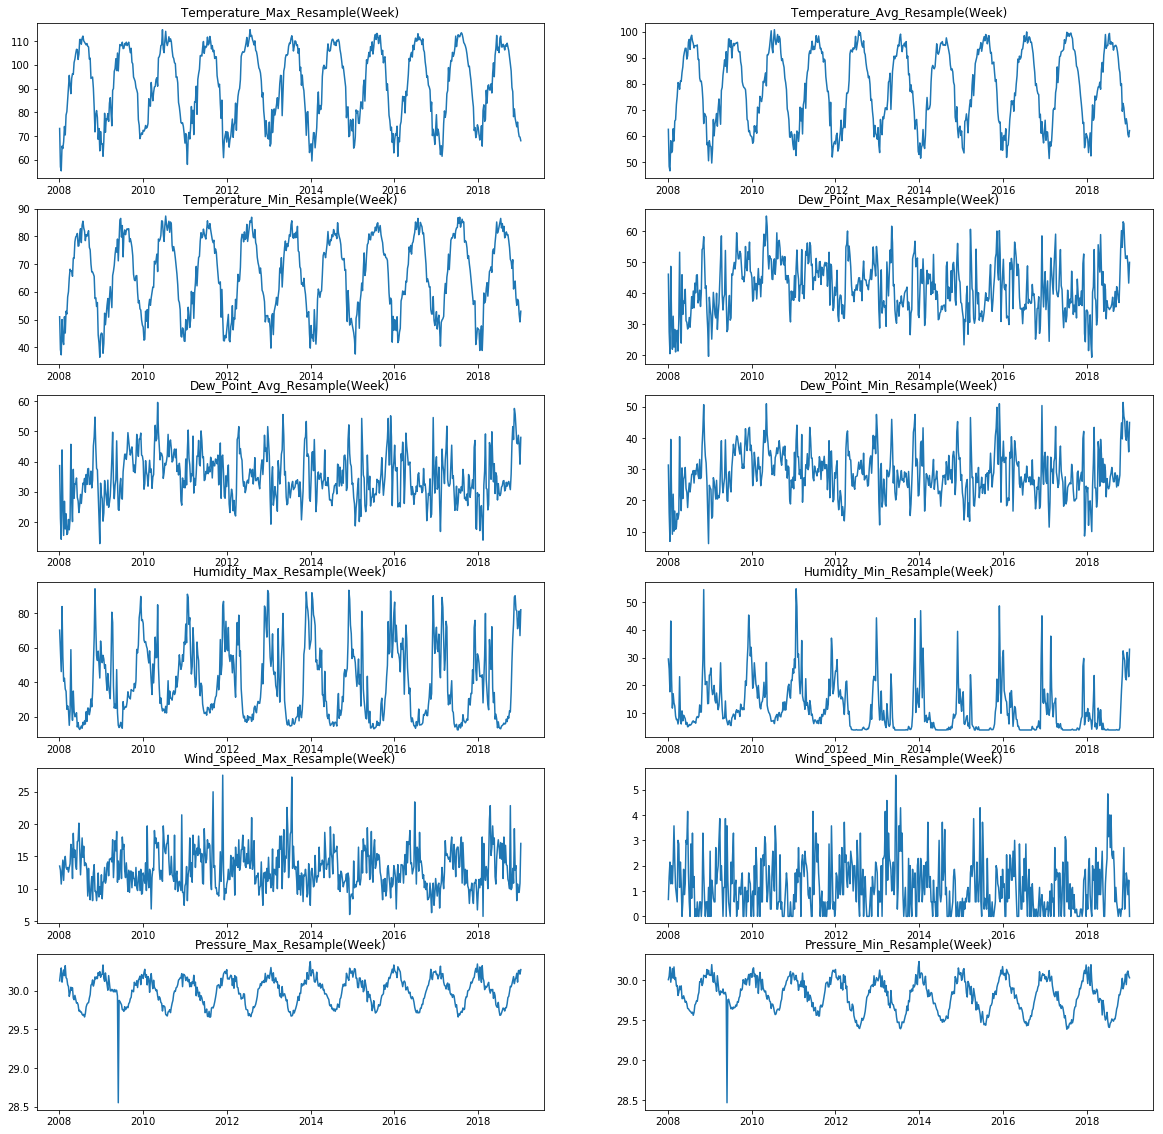

In [15]:
# resampel data from days to weeks
f, axarr = plt.subplots(6,2,figsize=(20,20))

axarr[0][0].plot(weather.Temperature_Max.resample('W').mean())
axarr[0][0].set_title('Temperature_Max_Resample(Week)')
axarr[0][1].plot(weather.Temperature_Avg.resample('W').mean())
axarr[0][1].set_title('Temperature_Avg_Resample(Week)')
axarr[1][0].plot(weather.Temperature_Min.resample('W').mean())
axarr[1][0].set_title('Temperature_Min_Resample(Week)')
axarr[1][1].plot(weather.Dew_Point_Max.resample('W').mean())
axarr[1][1].set_title('Dew_Point_Max_Resample(Week)')
axarr[2][0].plot(weather.Dew_Point_Avg.resample('W').mean())
axarr[2][0].set_title('Dew_Point_Avg_Resample(Week)')
axarr[2][1].plot(weather.Dew_Point_Min.resample('W').mean())
axarr[2][1].set_title('Dew_Point_Min_Resample(Week)')
axarr[3][0].plot(weather.Humidity_Max.resample('W').mean())
axarr[3][0].set_title('Humidity_Max_Resample(Week)')
axarr[3][1].plot(weather.Humidity_Min.resample('W').mean())
axarr[3][1].set_title('Humidity_Min_Resample(Week)')
axarr[4][0].plot(weather.Wind_speed_Max.resample('W').mean())
axarr[4][0].set_title('Wind_speed_Max_Resample(Week)')
axarr[4][1].plot(weather.Wind_speed_Min.resample('W').mean())
axarr[4][1].set_title('Wind_speed_Min_Resample(Week)')
axarr[5][0].plot(weather.Pressure_Max.resample('W').mean())
axarr[5][0].set_title('Pressure_Max_Resample(Week)')
axarr[5][1].plot(weather.Pressure_Min.resample('W').mean())
axarr[5][1].set_title('Pressure_Min_Resample(Week)')
plt.show()

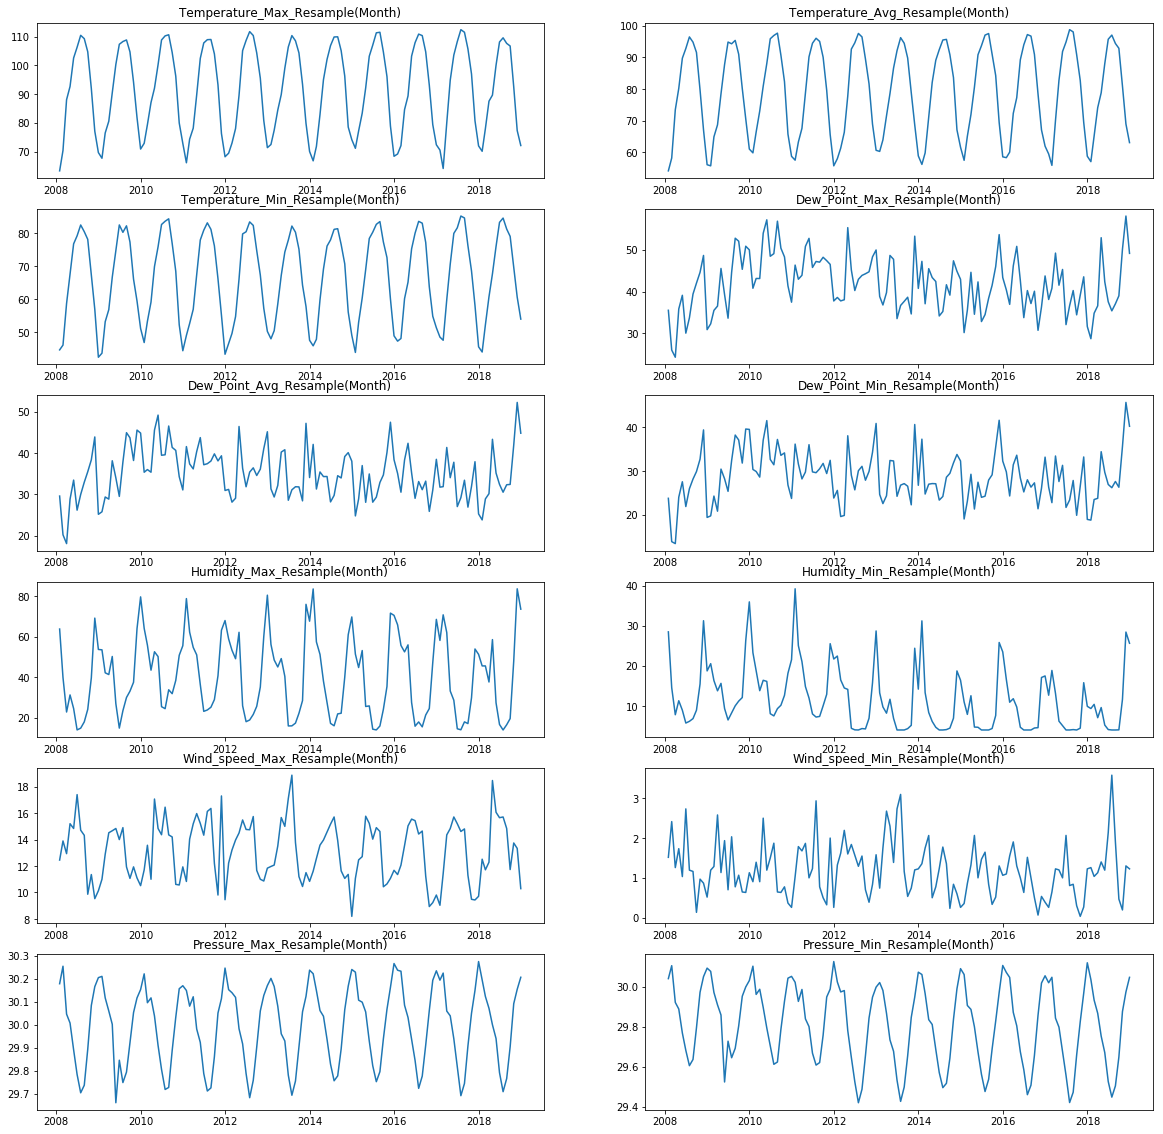

In [16]:
# resampel data from days to months

f, axarr = plt.subplots(6,2,figsize=(20,20))

axarr[0][0].plot(weather.Temperature_Max.resample('M').mean())
axarr[0][0].set_title('Temperature_Max_Resample(Month)')
axarr[0][1].plot(weather.Temperature_Avg.resample('M').mean())
axarr[0][1].set_title('Temperature_Avg_Resample(Month)')
axarr[1][0].plot(weather.Temperature_Min.resample('M').mean())
axarr[1][0].set_title('Temperature_Min_Resample(Month)')
axarr[1][1].plot(weather.Dew_Point_Max.resample('M').mean())
axarr[1][1].set_title('Dew_Point_Max_Resample(Month)')
axarr[2][0].plot(weather.Dew_Point_Avg.resample('M').mean())
axarr[2][0].set_title('Dew_Point_Avg_Resample(Month)')
axarr[2][1].plot(weather.Dew_Point_Min.resample('M').mean())
axarr[2][1].set_title('Dew_Point_Min_Resample(Month)')
axarr[3][0].plot(weather.Humidity_Max.resample('M').mean())
axarr[3][0].set_title('Humidity_Max_Resample(Month)')
axarr[3][1].plot(weather.Humidity_Min.resample('M').mean())
axarr[3][1].set_title('Humidity_Min_Resample(Month)')
axarr[4][0].plot(weather.Wind_speed_Max.resample('M').mean())
axarr[4][0].set_title('Wind_speed_Max_Resample(Month)')
axarr[4][1].plot(weather.Wind_speed_Min.resample('M').mean())
axarr[4][1].set_title('Wind_speed_Min_Resample(Month)')
axarr[5][0].plot(weather.Pressure_Max.resample('M').mean())
axarr[5][0].set_title('Pressure_Max_Resample(Month)')
axarr[5][1].plot(weather.Pressure_Min.resample('M').mean())
axarr[5][1].set_title('Pressure_Min_Resample(Month)')
plt.show()

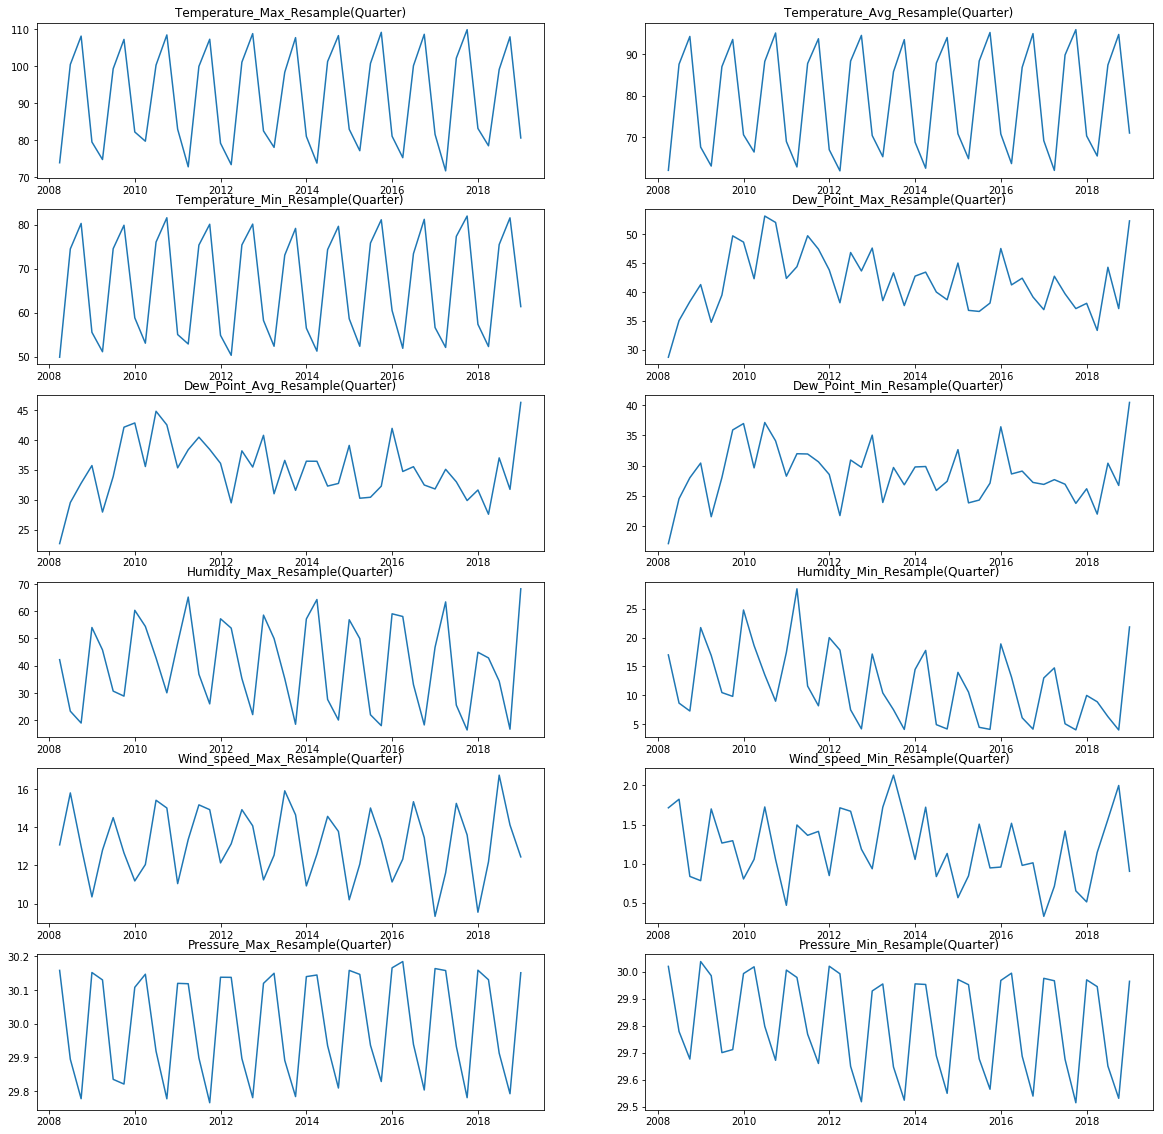

In [17]:
# resampel data from days to Quarters

f, axarr = plt.subplots(6,2,figsize=(20,20))

axarr[0][0].plot(weather.Temperature_Max.resample('Q').mean())
axarr[0][0].set_title('Temperature_Max_Resample(Quarter)')
axarr[0][1].plot(weather.Temperature_Avg.resample('Q').mean())
axarr[0][1].set_title('Temperature_Avg_Resample(Quarter)')
axarr[1][0].plot(weather.Temperature_Min.resample('Q').mean())
axarr[1][0].set_title('Temperature_Min_Resample(Quarter)')
axarr[1][1].plot(weather.Dew_Point_Max.resample('Q').mean())
axarr[1][1].set_title('Dew_Point_Max_Resample(Quarter)')
axarr[2][0].plot(weather.Dew_Point_Avg.resample('Q').mean())
axarr[2][0].set_title('Dew_Point_Avg_Resample(Quarter)')
axarr[2][1].plot(weather.Dew_Point_Min.resample('Q').mean())
axarr[2][1].set_title('Dew_Point_Min_Resample(Quarter)')
axarr[3][0].plot(weather.Humidity_Max.resample('Q').mean())
axarr[3][0].set_title('Humidity_Max_Resample(Quarter)')
axarr[3][1].plot(weather.Humidity_Min.resample('Q').mean())
axarr[3][1].set_title('Humidity_Min_Resample(Quarter)')
axarr[4][0].plot(weather.Wind_speed_Max.resample('Q').mean())
axarr[4][0].set_title('Wind_speed_Max_Resample(Quarter)')
axarr[4][1].plot(weather.Wind_speed_Min.resample('Q').mean())
axarr[4][1].set_title('Wind_speed_Min_Resample(Quarter)')
axarr[5][0].plot(weather.Pressure_Max.resample('Q').mean())
axarr[5][0].set_title('Pressure_Max_Resample(Quarter)')
axarr[5][1].plot(weather.Pressure_Min.resample('Q').mean())
axarr[5][1].set_title('Pressure_Min_Resample(Quarter)')
plt.show()

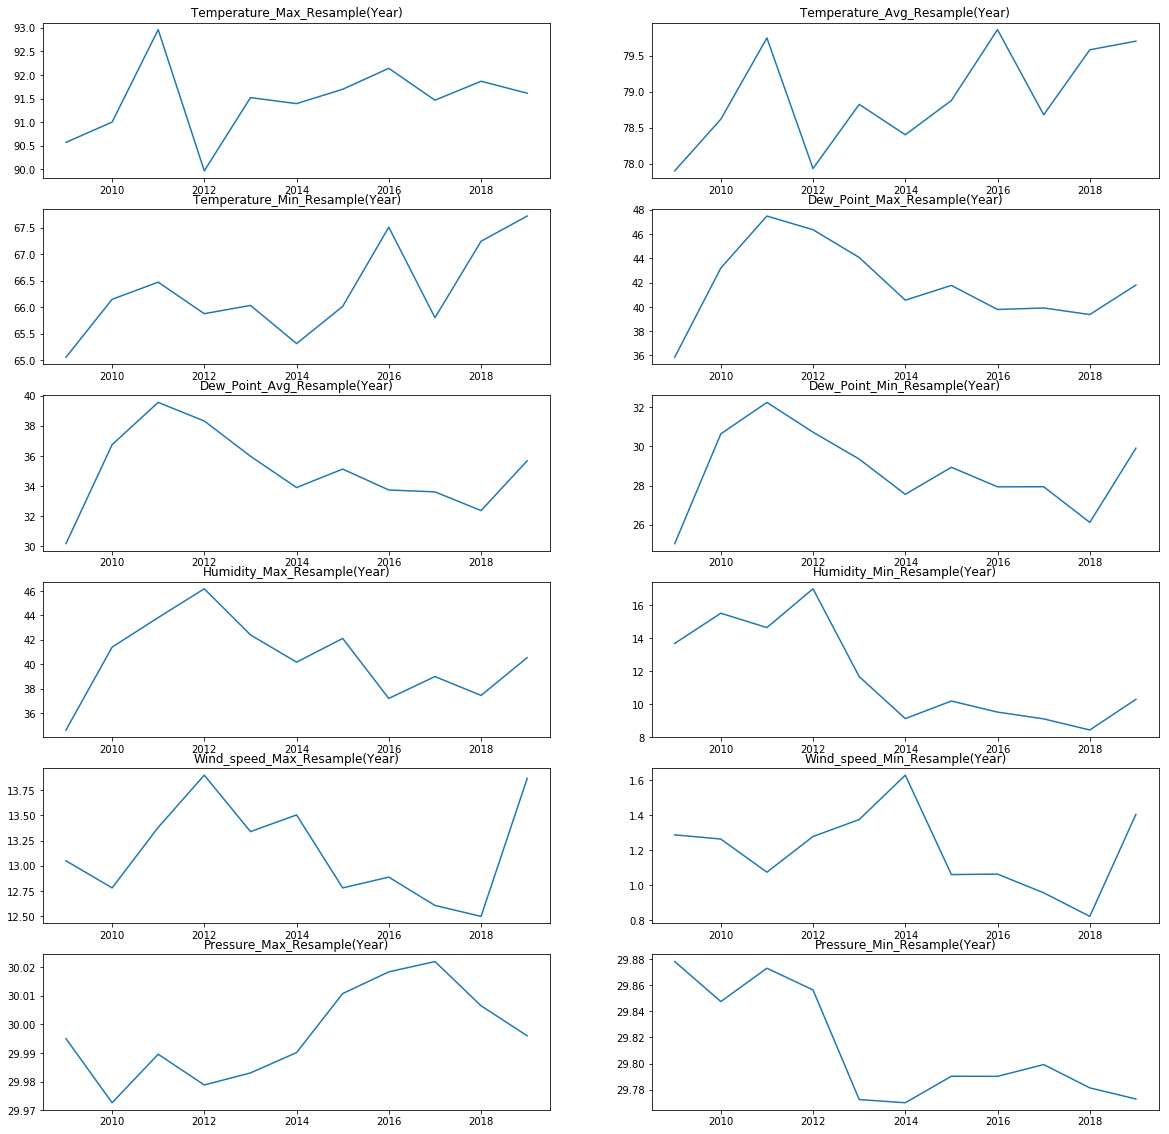

In [18]:
# resampel data from days to years
f, axarr = plt.subplots(6,2,figsize=(20,20))

axarr[0][0].plot(weather.Temperature_Max.resample('A').mean())
axarr[0][0].set_title('Temperature_Max_Resample(Year)')
axarr[0][1].plot(weather.Temperature_Avg.resample('A').mean())
axarr[0][1].set_title('Temperature_Avg_Resample(Year)')
axarr[1][0].plot(weather.Temperature_Min.resample('A').mean())
axarr[1][0].set_title('Temperature_Min_Resample(Year)')
axarr[1][1].plot(weather.Dew_Point_Max.resample('A').mean())
axarr[1][1].set_title('Dew_Point_Max_Resample(Year)')
axarr[2][0].plot(weather.Dew_Point_Avg.resample('A').mean())
axarr[2][0].set_title('Dew_Point_Avg_Resample(Year)')
axarr[2][1].plot(weather.Dew_Point_Min.resample('A').mean())
axarr[2][1].set_title('Dew_Point_Min_Resample(Year)')
axarr[3][0].plot(weather.Humidity_Max.resample('A').mean())
axarr[3][0].set_title('Humidity_Max_Resample(Year)')
axarr[3][1].plot(weather.Humidity_Min.resample('A').mean())
axarr[3][1].set_title('Humidity_Min_Resample(Year)')
axarr[4][0].plot(weather.Wind_speed_Max.resample('A').mean())
axarr[4][0].set_title('Wind_speed_Max_Resample(Year)')
axarr[4][1].plot(weather.Wind_speed_Min.resample('A').mean())
axarr[4][1].set_title('Wind_speed_Min_Resample(Year)')
axarr[5][0].plot(weather.Pressure_Max.resample('A').mean())
axarr[5][0].set_title('Pressure_Max_Resample(Year)')
axarr[5][1].plot(weather.Pressure_Min.resample('A').mean())
axarr[5][1].set_title('Pressure_Min_Resample(Year)')
plt.show()

### Autocorrelation in time series data
- is measured as the correlation between a time series and a delayed copy of itself.
- used to find repetitive patterns or periodic signal in time series.
- series can be forcast for the past

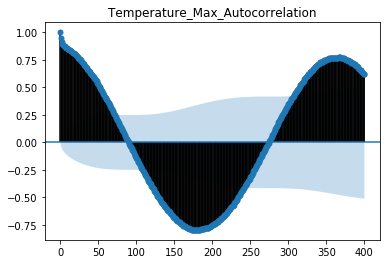

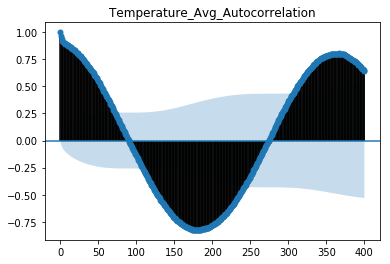

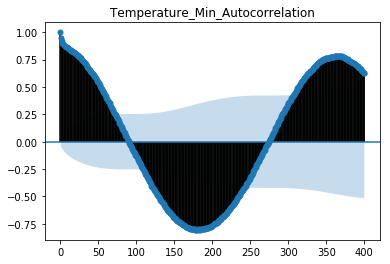

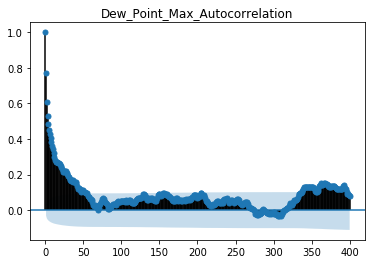

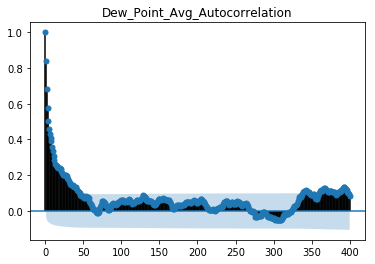

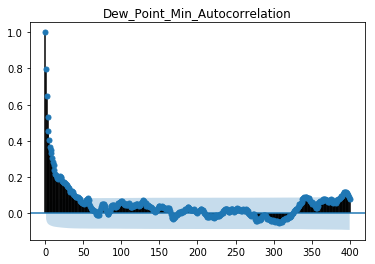

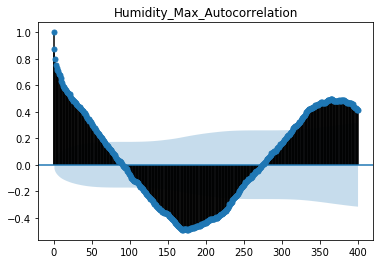

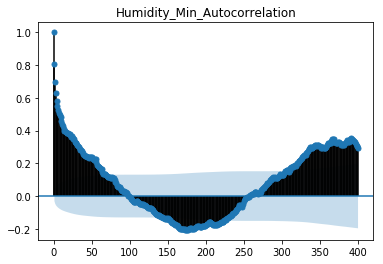

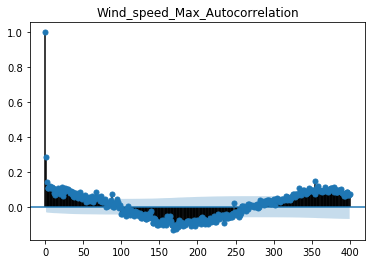

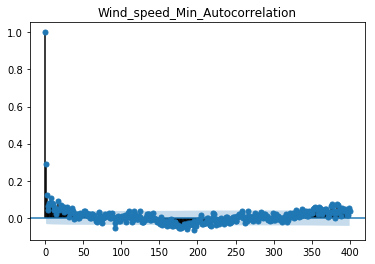

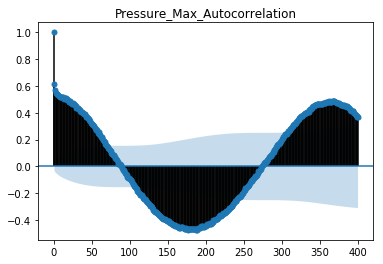

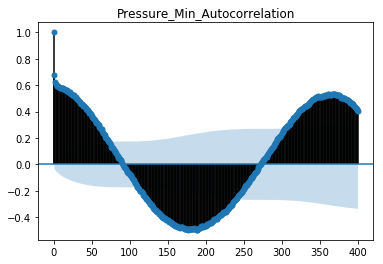

In [19]:
# Autocorrelation   of features
plot_acf(weather.Temperature_Max,lags=400,title='Temperature_Max_Autocorrelation')
plot_acf(weather.Temperature_Avg,lags=400,title='Temperature_Avg_Autocorrelation')
plot_acf(weather.Temperature_Min,lags=400,title='Temperature_Min_Autocorrelation')
plot_acf(weather.Dew_Point_Max,lags=400,title='Dew_Point_Max_Autocorrelation')
plot_acf(weather.Dew_Point_Avg,lags=400,title='Dew_Point_Avg_Autocorrelation')
plot_acf(weather.Dew_Point_Min,lags=400,title='Dew_Point_Min_Autocorrelation')
plot_acf(weather.Humidity_Max,lags=400,title='Humidity_Max_Autocorrelation')
plot_acf(weather.Humidity_Min,lags=400,title='Humidity_Min_Autocorrelation')
plot_acf(weather.Wind_speed_Max,lags=400,title='Wind_speed_Max_Autocorrelation')
plot_acf(weather.Wind_speed_Min,lags=400,title='Wind_speed_Min_Autocorrelation')
plot_acf(weather.Pressure_Max,lags=400,title='Pressure_Max_Autocorrelation')
plot_acf(weather.Pressure_Min,lags=400,title='Pressure_Min_Autocorrelation')
plt.show()

 

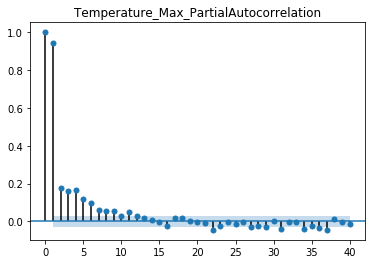

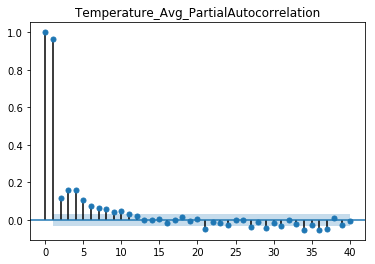

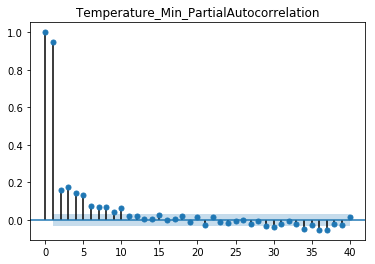

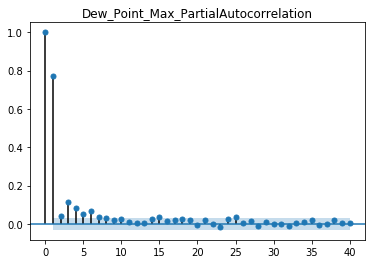

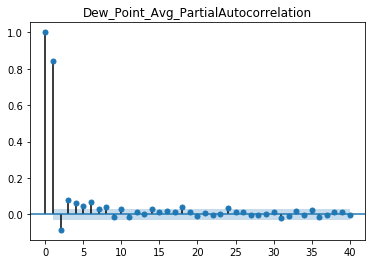

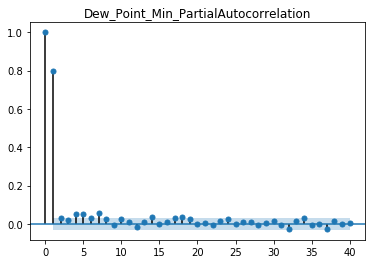

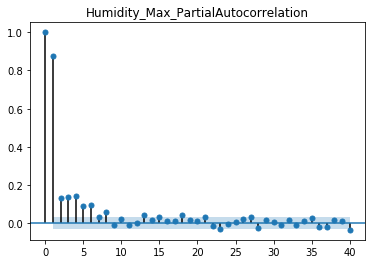

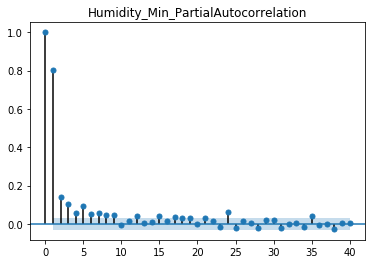

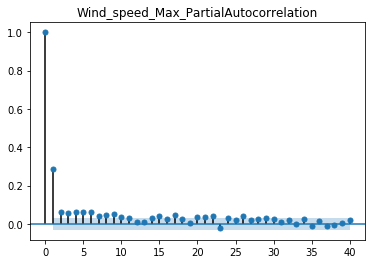

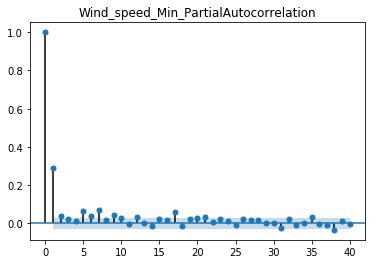

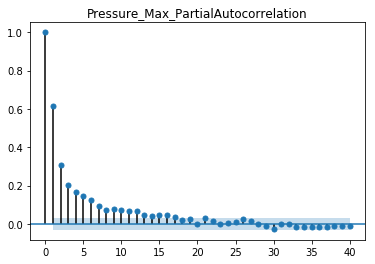

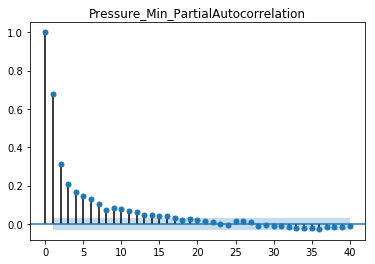

In [20]:
# Partial-Autocorrelation  of features

plot_pacf(weather.Temperature_Max,lags=40,title='Temperature_Max_PartialAutocorrelation')
plot_pacf(weather.Temperature_Avg,lags=40,title='Temperature_Avg_PartialAutocorrelation')
plot_pacf(weather.Temperature_Min,lags=40,title='Temperature_Min_PartialAutocorrelation')
plot_pacf(weather.Dew_Point_Max,lags=40,title='Dew_Point_Max_PartialAutocorrelation')
plot_pacf(weather.Dew_Point_Avg,lags=40,title='Dew_Point_Avg_PartialAutocorrelation')
plot_pacf(weather.Dew_Point_Min,lags=40,title='Dew_Point_Min_PartialAutocorrelation')
plot_pacf(weather.Humidity_Max,lags=40,title='Humidity_Max_PartialAutocorrelation')
plot_pacf(weather.Humidity_Min,lags=40,title='Humidity_Min_PartialAutocorrelation')
plot_pacf(weather.Wind_speed_Max,lags=40,title='Wind_speed_Max_PartialAutocorrelation')
plot_pacf(weather.Wind_speed_Min,lags=40,title='Wind_speed_Min_PartialAutocorrelation')
plot_pacf(weather.Pressure_Max,lags=40,title='Pressure_Max_PartialAutocorrelation')
plot_pacf(weather.Pressure_Min,lags=40,title='Pressure_Min_PartialAutocorrelation')
plt.show()

 

In [21]:
#  differencing  of features
Temperature_Max=weather.Temperature_Max.diff()
Temperature_Avg=weather.Temperature_Avg.diff()
Temperature_Min=weather.Temperature_Min.diff()
Dew_Point_Max=weather.Dew_Point_Max.diff()
Dew_Point_Avg=weather.Dew_Point_Avg.diff()
Dew_Point_Min=weather.Dew_Point_Min.diff()
Humidity_Max=weather.Humidity_Max.diff()
Humidity_Min=weather.Humidity_Min.diff()
Wind_speed_Max=weather.Wind_speed_Max.diff()
Wind_speed_Min=weather.Wind_speed_Min.diff()
Pressure_Max=weather.Pressure_Max.diff()
Pressure_Min=weather.Pressure_Min.diff()

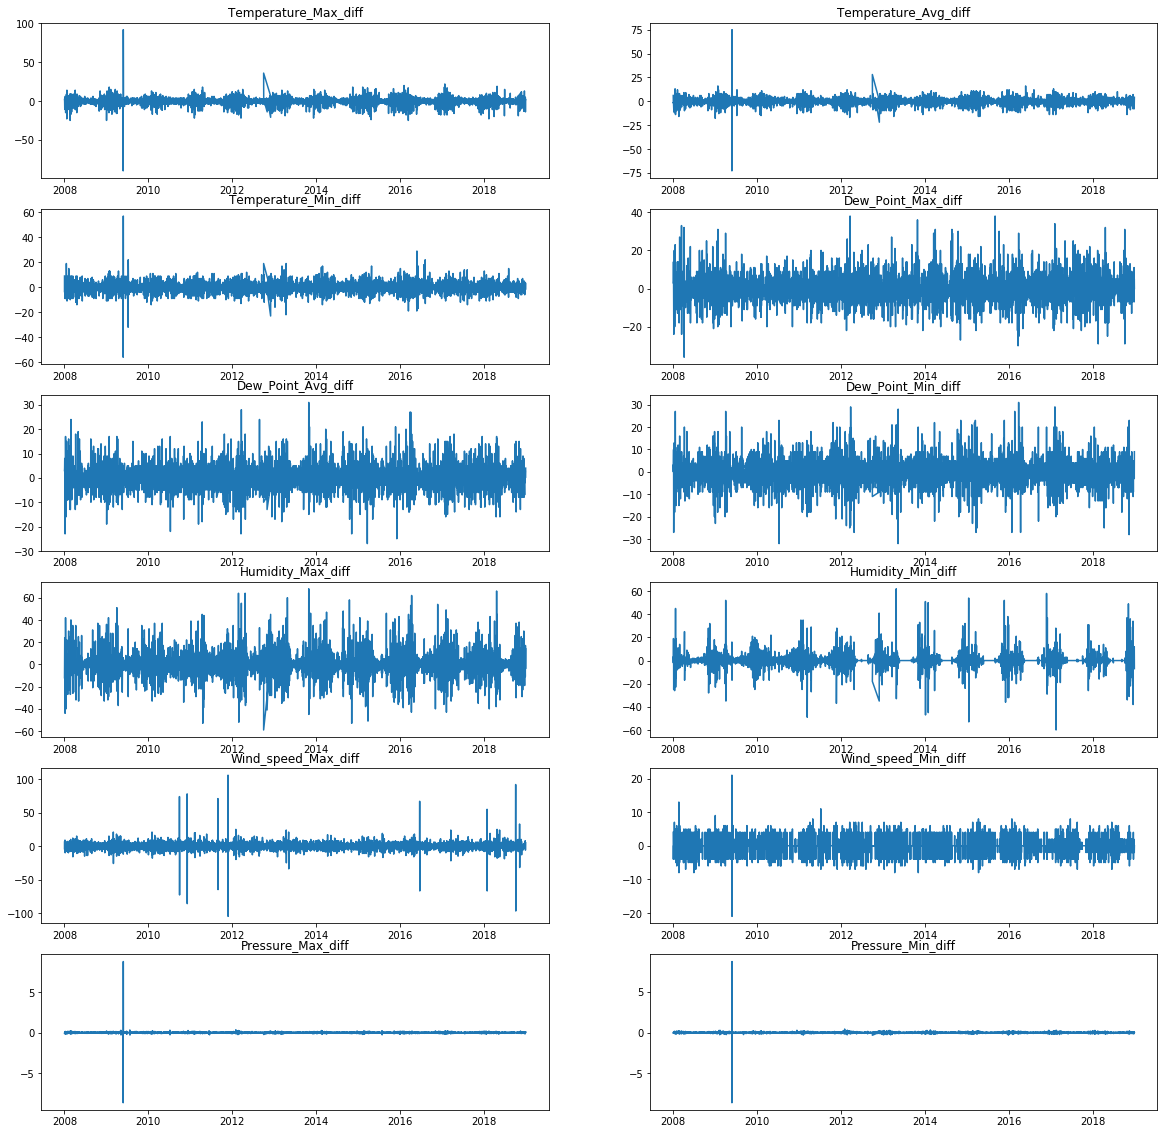

In [22]:
# visualize differencing of features

f, axarr = plt.subplots(6,2,figsize=(20,20))
axarr[0][0].plot(Temperature_Max)
axarr[0][0].set_title('Temperature_Max_diff')
axarr[0][1].plot(Temperature_Avg)
axarr[0][1].set_title('Temperature_Avg_diff')
axarr[1][0].plot(Temperature_Min)
axarr[1][0].set_title('Temperature_Min_diff')
axarr[1][1].plot(Dew_Point_Max)
axarr[1][1].set_title('Dew_Point_Max_diff')
axarr[2][0].plot(Dew_Point_Avg)
axarr[2][0].set_title('Dew_Point_Avg_diff')
axarr[2][1].plot(Dew_Point_Min)
axarr[2][1].set_title('Dew_Point_Min_diff')
axarr[3][0].plot(Humidity_Max)
axarr[3][0].set_title('Humidity_Max_diff')
axarr[3][1].plot(Humidity_Min)
axarr[3][1].set_title('Humidity_Min_diff')
axarr[4][0].plot(Wind_speed_Max)
axarr[4][0].set_title('Wind_speed_Max_diff')
axarr[4][1].plot(Wind_speed_Min)
axarr[4][1].set_title('Wind_speed_Min_diff')
axarr[5][0].plot(Pressure_Max)
axarr[5][0].set_title('Pressure_Max_diff')
axarr[5][1].plot(Pressure_Min)
axarr[5][1].set_title('Pressure_Min_diff')
plt.show()


## Apply Time Series model (ARIMA)

In [23]:
# 2,1,1 ARIMA Model
model = ARIMA(weather['Temperature_Avg'], (2,1,1))


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
# fit Model
results = model.fit(trend='nc')

In [25]:
#get summary result
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Temperature_Avg   No. Observations:                 4015
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -11154.678
Method:                       css-mle   S.D. of innovations              3.893
Date:                Thu, 09 May 2019   AIC                          22317.356
Time:                        04:59:27   BIC                          22342.547
Sample:                             1   HQIC                         22326.284
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ar.L1.D.Temperature_Avg     0.5749      0.022     25.748      0.000       0.531       0.619
ar.L2.D.Temperature_Avg    -0.0955      0.018     -5.455      0.000      -0.130      -0.061
ma.L1.D.Temperature_Avg    -0.8061      0.017    -48.537      0.000      -0.839      -0.774
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0097           -1.1884j            3.2358           -0.0599
AR.2            3.0097           +1.1884j            3.2358            0.0599
MA.1            1.2405           +0.0000j            1.2405            0.0000
-----------------------------------------------------------------------------
"""

- The AIC is high wich is not Good. The P-values of the X terms are less the < 0.05, which is great.

- So overall AIC need to be reduce to get  better result.

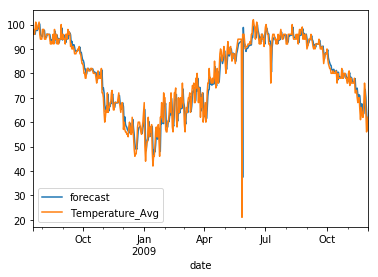

In [26]:
# plot and predict
results.plot_predict(200, 700, dynamic=False);


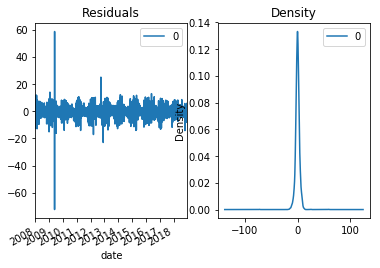

In [27]:
# Plot residual errors
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

- The residual errors seem fine with near zero mean but there is no uniform variance. 

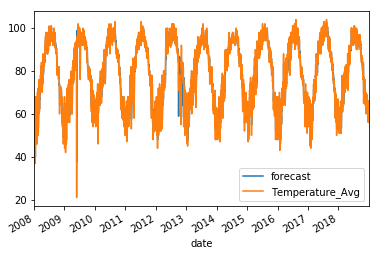

In [28]:
# Actual vs Fitted
results.plot_predict(dynamic=False)
plt.show()

In [29]:
# make predection
results.predict(2, 5)


date
2008-01-03   -0.795277
2008-01-04   -0.839782
2008-01-05   -0.261915
2008-01-06    0.907091
dtype: float64

In [30]:
# forcast
results.forecast(4)


(array([61.76772304, 61.2521687 , 60.97796636, 60.86956888]),
 array([3.89333941, 4.91092093, 5.34258994, 5.60006815]),
 array([[54.13691801, 69.39852806],
        [51.62694054, 70.87739686],
        [50.50668251, 71.44925022],
        [49.89363699, 71.84550077]]))

# Conclosion

- It seems that the model needs to be improved maybe using monthly values to predict Average Temperature values or even yearly and compare between them instead of days which didn't make a good prediction.